In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


white_path = "wine-white.csv"
red_path = "wine-red.csv"

red_wine = pd.read_csv(red_path)
white_wine = pd.read_csv(white_path)

white_wine['label'] = 'default'
red_wine['label'] = 'default'


In [2]:
def labelWine(threshhold, wine_type, data): # function labels the white as being good or bad based on the threshhold value provided
    for index, row in data.iterrows():
        number = -1
        if wine_type == "red":
            number = 0
        
        elif wine_type == "white":
            number = 2
        
        
        
        quality = row['quality']
        if quality<threshhold: 
            data.at[index,'label'] = number
        else:
            data.at[index,'label'] = number+1
            
    return data


red_wine = labelWine(6, "red", red_wine)  #labeling the wine as being good or bad for both white and red whites
white_wine = labelWine(6, "white",white_wine)     

wine = pd.concat([red_wine,white_wine], ignore_index=True) #combining the red and white wine dataset after labeling 


    
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,3
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,2
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,3
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,3


# Clustering the dataset into 4 clusters  (KMeans)
- The goal is to have the data group itself into good white wine, good red white wine, bad white wine and bad red wine
- good and bad wine will be determined by its quality rating

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from IPython.display import Markdown

from sklearn.preprocessing import scale

temp = wine.drop('quality',1)
labels = temp['label']
feature = temp.drop('label',1)
feature_scaled = scale(feature)


scores = {name: [] for name in ('auto', 'full', 'elkan')}
scores_scaled = {name: [] for name in ('auto', 'full', 'elkan')}

for algorithm in ('auto', 'full', 'elkan'):
    for seed in np.arange(0, 10):
        kmeans = KMeans(n_clusters = 4, random_state = seed, algorithm = algorithm)
        kmeans_scaled = KMeans(n_clusters = 4, random_state = seed, algorithm = algorithm)
        
        kmeans.fit(feature)
        kmeans_scaled.fit(feature_scaled)
        
        ARI_score = metrics.adjusted_rand_score(kmeans.labels_ ,labels)
        ARI_score_scaled = metrics.adjusted_rand_score(kmeans_scaled.labels_ ,labels)
        
        array = kmeans.labels_
        
        scores[algorithm].append(ARI_score)
        scores_scaled[algorithm].append(ARI_score_scaled)
        
        print(algorithm, seed, ARI_score)

        


median_auto = np.median(np.array(scores['auto']))
median_full = np.median(np.array(scores['full']))
median_elkan = np.median(np.array(scores['elkan']))     

median_auto_scaled = np.median(np.array(scores_scaled['auto']))
median_full_scaled = np.median(np.array(scores_scaled['full']))
median_elkan_scaled = np.median(np.array(scores_scaled['elkan']))  


display(Markdown(\
f'|[]()|Median scores|\n{"|---"*2}|\n'
f'|**auto**|{median_auto:.4}|\n'
f'|**full**|{median_full:.4}|\n'
f'|**elkan**|{median_elkan:.4}|\n'))

display(Markdown(\
f'|[]()|Median scores scaled|\n{"|---"*2}|\n'
f'|**auto**|{median_auto_scaled:.4}|\n'
f'|**full**|{median_full_scaled:.4}|\n'
f'|**elkan**|{median_elkan_scaled:.4}|\n'))
        
        
        


auto 0 0.1790886139178354
auto 1 0.17916415799812466
auto 2 0.1792577499620072
auto 3 0.17901233887814302
auto 4 0.17902706339533264
auto 5 0.17919798644423574
auto 6 0.17892223680057928
auto 7 0.17919798644423574
auto 8 0.1795126908651767
auto 9 0.1792795183615587
full 0 0.1790886139178354
full 1 0.17916415799812466
full 2 0.1792577499620072
full 3 0.17901233887814302
full 4 0.17902706339533264
full 5 0.17919798644423574
full 6 0.17892223680057928
full 7 0.17919798644423574
full 8 0.1795126908651767
full 9 0.1792795183615587
elkan 0 0.1790886139178354
elkan 1 0.17916415799812466
elkan 2 0.1792577499620072
elkan 3 0.17901233887814302
elkan 4 0.17902706339533264
elkan 5 0.17919798644423574
elkan 6 0.17892223680057928
elkan 7 0.17919798644423574
elkan 8 0.1795126908651767
elkan 9 0.1792795183615587


|[]()|Median scores|
|---|---|
|**auto**|0.1792|
|**full**|0.1792|
|**elkan**|0.1792|


|[]()|Median scores scaled|
|---|---|
|**auto**|0.3223|
|**full**|0.3223|
|**elkan**|0.3223|


## results
- in regards to the algorithm selected for the kmeans testing it appears to not have an impact on the result as shown by the tables above
- the medians that we recieved after finding the ARI scores from 0-9 are 0.1792, this was unscaled
- after scaling the features we achieved a better ARI score of 0.3223

### you should really run the above code again with scaled data and compare the results. Then discuss why they are better or worse.

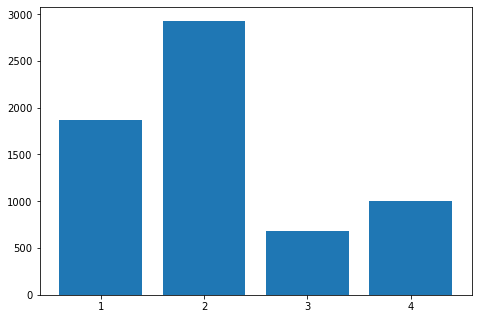

In [17]:
zero = np.count_nonzero(array==0)
one = np.count_nonzero(array==1)
two = np.count_nonzero(array==2)
three = np.count_nonzero(array==3)

clusters = ['1', '2', '3', '4']
count = [zero, one, two, three]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(clusters,count)

plt.show()


## bar graph
- this is a bar graph of the distribution of points in each of the cluster
- the clusters are suppose to represent good white wines, bad white wines, good red wines and bad red wines
- from the bar graph and data alone however we do not know what each cluster represents 


# DBSCAN
- test different eps values with different min_samples values and plot the results
- find the combination that provides the highest score 
- use scaled data to improve results

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.040151033780209865
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.19490362896630045
0.18163592921594482
0.17458938914093017
0.16563407380631814
0.16252592012962677
0.1550567380662757
0.14538719984020723
0.1302095971863385
0.11454366683447076
0.11103677917465625
0.18933893668218796
0.18289421993410052
0.17906064808073408
0.17515697438389216
0.16158549139705897
0.1547390820343369
0.1501257155192769
0.13967012559603095
0.14344785554488085
0.14659121069716913
-0.012268963615929518
-0.013496274243714405
-0.012252918847607033
-0.0039156786391152535
-0.0027364259199610034
0.23513134334058194
0.22909282186894772
0.2242672108607253
0.22062594173223998
0.20960450580880308
-0.006002172374603926
-0.006770999839329486
-0.006431176701109696
-0.008411722754419683
-0.007567615730262523
-0.008528536636636653
-0.007690717923401826
-0.007994043391145176
-0.009253580597410173
-0.00883755749790154
-0.003671413426555708
-0.004284593358634651
-0.005486231181636613
-0.00524342

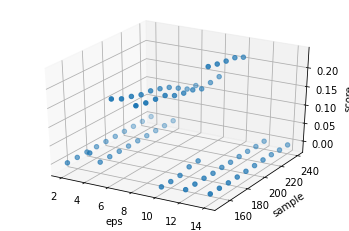

In [29]:
from sklearn.cluster import DBSCAN


xs = []
ys = []
zs = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
max_value = 0 
max_eps = -5
samples_ = -5

for eps in range(2,16,2):
        for samples in range(150, 250, 10):
            
            xs.append(eps)
            ys.append(samples)
            
            db = DBSCAN (eps = eps , min_samples = samples)
            db.fit(temp.drop('label',1))
            
            ARI_score = metrics.adjusted_rand_score(db.labels_,labels)
            print(ARI_score)
            zs.append(ARI_score)
            if ARI_score > max_value:
                max_value = ARI_score
                max_eps = eps
                samples_ = samples


            
print("max value is:", max_value)
print("eps: ", max_eps)
print("min_samples: ", samples_)


ax.scatter(xs, ys, zs)
ax.set_xlabel('eps')
ax.set_ylabel('sample')
ax.set_zlabel('score')

plt.show()


## Results
- the data was tested using mutile eps and min_samples values
- the highest ARI score we achieved was 0.235 with eps = 10 and min_samples = 200
- the test was done using scaled feature values